In [1]:
import numpy as np
import pandas as pd

In [2]:
pf = pd.read_csv('spam.csv', encoding='latin1')


In [3]:
pf.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
704,ham,True dear..i sat to pray evening and felt so.s...,NaN,NaN,NaN
4469,ham,"Lemme know when I can swing by and pick up, I'...",NaN,NaN,NaN
670,ham,Ho ho - big belly laugh! See ya tomo,NaN,NaN,NaN
2798,ham,I've told him that i've returned it. That shou...,NaN,NaN,NaN
4085,ham,Lemme know when you're here,NaN,NaN,NaN


In [4]:
pf.shape

(5572, 5)

## 1.) Data cleaning

In [5]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#dropping last 3 cols
pf.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
pf.shape

(5572, 2)

In [8]:
#renaming the cols
pf.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
pf.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#labeling ham->0 and spam->1
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
pf['Target']=encoder.fit_transform(pf['Target'])
pf.sample(5)

,Target,Text
3873,0,No. Did you multimedia message them or e-mail?
371,0,I will spoil you in bed as well :)
1638,0,Great comedy..cant stop laughing da:)
161,0,New car and house for my parents.:)i have only...
5526,1,PRIVATE! Your 2003 Account Statement for shows...


In [10]:
#missing values
pf.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
#check for duplicate
pf.duplicated().sum()

403

In [12]:
#removing all the duplicates
pf=pf.drop_duplicates(keep='first')

In [13]:
pf.duplicated().sum()

0

In [14]:
pf.shape

(5169, 2)

## 2.)EDA

In [15]:
#how many sms are "Ham" and "Spam"
pf['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

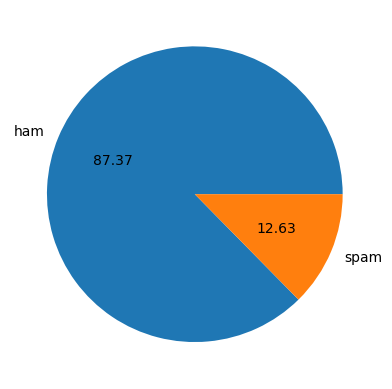

In [16]:
import matplotlib.pyplot as plt
plt.pie(pf['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
#data is imbalanced

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
import string

## 3.) Data Preprocessing
        Lower case
        Tokenization
        Removing special chrs
        Remove stop words and punctuation
        Stemming


In [20]:
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)

    y=[]
    for i in Text:
        if i.isalnum():
            y.append(i)

    Text = y[:]
    y.clear()

    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    Text= y[:]
    y.clear()

    for i in Text:
        y.append(ps.stem(i))
    return " ".join(y)

In [21]:
# transform_text('i am loving the whether it is amazing')

In [22]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [23]:
pf['transform_text']=pf['Text'].apply(transform_text)

In [24]:
pf.head()

,Target,Text,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [25]:
!pip install wordcloud
from wordcloud import WordCloud


In [26]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [27]:
spam_wc = wc.generate(pf[pf['Target']==1]['transform_text'].str.cat(sep=" "))

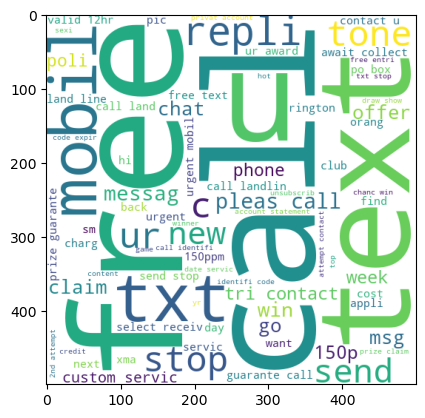

In [28]:
plt.imshow(spam_wc)

In [29]:
ham_wc = wc.generate(pf[pf['Target']==0]['transform_text'].str.cat(sep=" "))

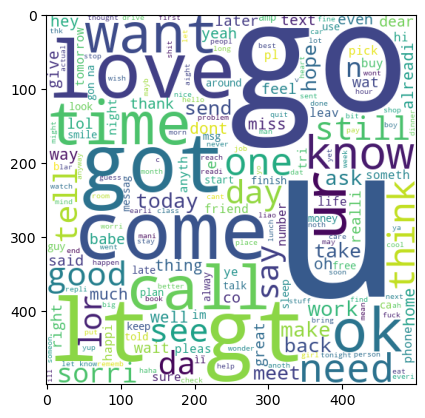

In [30]:
plt.imshow(ham_wc)

## 5.) Model Building

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [32]:
X = tfidf.fit_transform(pf['transform_text']).toarray()

In [33]:
X.shape

(5169, 6708)

In [34]:
y=pf['Target'].values

In [35]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)
print( accuracy_score(y_test, y_pred1))
print( confusion_matrix(y_test, y_pred1))
print(precision_score(y_test,y_pred1))

0.9468085106382979
[[895   1]
 [ 54  84]]
0.9882352941176471


#### Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print( confusion_matrix(y_test, y_pred2))
print(precision_score(y_test,y_pred2))

0.9545454545454546
[[873  23]
 [ 24 114]]
0.8321167883211679


#### Naive bayes 

In [40]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


In [41]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [42]:
gnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [43]:
mnb.fit(X_train,y_train)
y_pred4 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [44]:
bnb.fit(X_train,y_train)
y_pred5 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#### Random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred6 = rf.predict(X_test)
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9738878143133463
[[895   1]
 [ 26 112]]
0.9911504424778761


In [46]:
final_data=pd.DataFrame({'Models':['lr','dt','GNB','MNB','BNB','rf'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                               accuracy_score(y_test,y_pred2),
                               accuracy_score(y_test,y_pred3),
                               accuracy_score(y_test,y_pred4),
                               accuracy_score(y_test,y_pred5),
                               accuracy_score(y_test,y_pred6)]})

In [47]:
final_data

,Models,ACC
0,lr,0.946809
1,dt,0.954545
2,GNB,0.876209
3,MNB,0.959381
4,BNB,0.970019
5,rf,0.973888


In [48]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

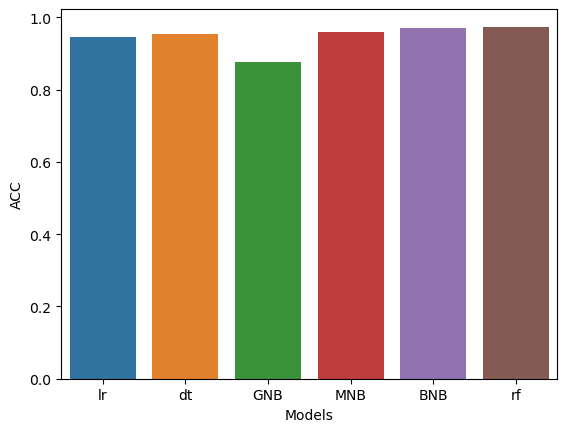

In [49]:
sns.barplot(x='Models',y='ACC',data=final_data)

### As accuracy of GNB and LR is less so dropping those and 
### now proceeding with PRECISION SCORE 

In [50]:
final_data1=pd.DataFrame({'Models':['dt','MNB','BNB','rf'],
                         'pre':[precision_score(y_test,y_pred2),
                               precision_score(y_test,y_pred4),
                               precision_score(y_test,y_pred5),
                               precision_score(y_test,y_pred6)]})

In [51]:
final_data1

,Models,pre
0,dt,0.832117
1,MNB,1.000000
2,BNB,0.973451
3,rf,0.991150


### Clearly MNB has good precision score